In [2]:
import pandas as pd
from pandas import DataFrame 
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import numpy as np
import dataframe_image as dfi
import statsmodels.api as sm

In [3]:
file = "/Users/yi-chunwang/OneDrive - Perspectum Diagnostics Ltd/Python/PineappleJuice/FinalDF.csv"
read_file = pd.read_csv(file, delimiter = ",", header= 0)
read_file

,Unnamed: 0,Record Id,Portal_ID (Pre PJ),EXP_number (Pre PJ),cT1 median (Pre PJ),Iron median (Pre PJ),PDFF median (Pre PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),...,Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1_Ref_Upper_y,cT1_Ref_Lower_y,Iron_Ref_y,PDFF_Ref_y,vendor_model (Post PJ),field_strength (Post PJ)
0,0,EXP010_002,11947,EXP010vhobplp,654.0,1.1,4.9,626.0,695.0,1.1,...,1.1,1.2,3.8,5.9,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
1,1,EXP010_003,9625,EXP010vetygxw,667.0,1.1,6.1,643.0,701.0,1.1,...,1.0,1.1,4.1,7.0,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
2,2,EXP010_004,9834,EXP010vkcrjqc,836.0,1.0,1.9,808.0,881.0,1.0,...,0.8,0.8,1.1,2.7,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
3,3,EXP010_005,9818,EXP010vpitawu,826.0,1.0,1.2,793.0,875.0,0.9,...,0.9,1.0,0.4,3.1,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
4,4,EXP010_006,9843,EXP010vuvdody,638.0,1.1,3.6,614.0,675.0,1.0,...,1.1,1.2,1.6,3.8,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
5,5,EXP010_007,9820,EXP010woaclvx,658.0,1.1,1.3,633.0,699.0,1.0,...,1.0,1.1,0.0,2.7,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
6,6,EXP010_008,9618,EXP010wktzdls,823.0,0.9,1.6,780.0,861.0,0.9,...,0.8,0.9,1.3,3.1,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
7,7,EXP010_009,9819,EXP010waxoiey,615.0,1.3,1.7,597.0,652.0,1.2,...,1.3,1.5,0.0,3.1,633.0,794.0,1.8,5.6,SIEMENSAvanto_ﬁt,.5T
8,8,EXP010_011,9962,EXP010wlnocav,962.0,1.3,21.0,883.0,103.0,1.3,...,1.3,1.4,19.0,-22.0,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T
9,9,EXP010_012,9973,EXP010wrtonqh,688.0,1.0,3.4,664.0,722.0,1.0,...,1.0,1.0,0.9,3.3,633.0,794.0,1.8,5.6,SIEMENSPrisma,3T


In [4]:
# See the detail of the dataframe 'read_file'
read_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                40 non-null     int64  
 1   Record Id                 40 non-null     object 
 2   Portal_ID (Pre PJ)        40 non-null     object 
 3   EXP_number (Pre PJ)       31 non-null     object 
 4   cT1 median (Pre PJ)       31 non-null     float64
 5   Iron median (Pre PJ)      31 non-null     float64
 6   PDFF median (Pre PJ)      31 non-null     float64
 7   cT1 Q1 (Pre PJ)           31 non-null     float64
 8   cT1 Q3 (Pre PJ)           31 non-null     float64
 9   Iron Q1 (Pre PJ)          31 non-null     float64
 10  Iron Q3 (Pre PJ)          31 non-null     float64
 11  PDFF Q1 (Pre PJ)          31 non-null     float64
 12  PDFF Q3 (Pre PJ)          31 non-null     float64
 13  cT1_Ref_Upper_x           31 non-null     float64
 14  cT1_Ref_Lowe

In [5]:
# drop the NaN columns
drop_columns = read_file.drop(labels = None, axis = 1, columns = ['Unnamed: 0', 'cT1_Ref_Upper_x', 'cT1_Ref_Lower_x', 'Iron_Ref_x', 'PDFF_Ref_x']) 
drop_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Record Id                 40 non-null     object 
 1   Portal_ID (Pre PJ)        40 non-null     object 
 2   EXP_number (Pre PJ)       31 non-null     object 
 3   cT1 median (Pre PJ)       31 non-null     float64
 4   Iron median (Pre PJ)      31 non-null     float64
 5   PDFF median (Pre PJ)      31 non-null     float64
 6   cT1 Q1 (Pre PJ)           31 non-null     float64
 7   cT1 Q3 (Pre PJ)           31 non-null     float64
 8   Iron Q1 (Pre PJ)          31 non-null     float64
 9   Iron Q3 (Pre PJ)          31 non-null     float64
 10  PDFF Q1 (Pre PJ)          31 non-null     float64
 11  PDFF Q3 (Pre PJ)          31 non-null     float64
 12  vendor_model (Pre PJ)     31 non-null     object 
 13  field_strength (Pre PJ)   31 non-null     object 
 14  Portal_ID (P

In [7]:
#drop the rows with NaN  #axis = 0 means to drop rows which contain missing values
drop_row = drop_columns.dropna(axis = 0)
drop_row.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 39
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Record Id                 30 non-null     object 
 1   Portal_ID (Pre PJ)        30 non-null     object 
 2   EXP_number (Pre PJ)       30 non-null     object 
 3   cT1 median (Pre PJ)       30 non-null     float64
 4   Iron median (Pre PJ)      30 non-null     float64
 5   PDFF median (Pre PJ)      30 non-null     float64
 6   cT1 Q1 (Pre PJ)           30 non-null     float64
 7   cT1 Q3 (Pre PJ)           30 non-null     float64
 8   Iron Q1 (Pre PJ)          30 non-null     float64
 9   Iron Q3 (Pre PJ)          30 non-null     float64
 10  PDFF Q1 (Pre PJ)          30 non-null     float64
 11  PDFF Q3 (Pre PJ)          30 non-null     float64
 12  vendor_model (Pre PJ)     30 non-null     object 
 13  field_strength (Pre PJ)   30 non-null     object 
 14  Portal_ID (P

In [8]:
groupby = [x for _, x in drop_row.groupby('vendor_model (Pre PJ)')]
AV = groupby[0]
PA = groupby[1]

In [9]:
PA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 37
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Record Id                 17 non-null     object 
 1   Portal_ID (Pre PJ)        17 non-null     object 
 2   EXP_number (Pre PJ)       17 non-null     object 
 3   cT1 median (Pre PJ)       17 non-null     float64
 4   Iron median (Pre PJ)      17 non-null     float64
 5   PDFF median (Pre PJ)      17 non-null     float64
 6   cT1 Q1 (Pre PJ)           17 non-null     float64
 7   cT1 Q3 (Pre PJ)           17 non-null     float64
 8   Iron Q1 (Pre PJ)          17 non-null     float64
 9   Iron Q3 (Pre PJ)          17 non-null     float64
 10  PDFF Q1 (Pre PJ)          17 non-null     float64
 11  PDFF Q3 (Pre PJ)          17 non-null     float64
 12  vendor_model (Pre PJ)     17 non-null     object 
 13  field_strength (Pre PJ)   17 non-null     object 
 14  Portal_ID (P

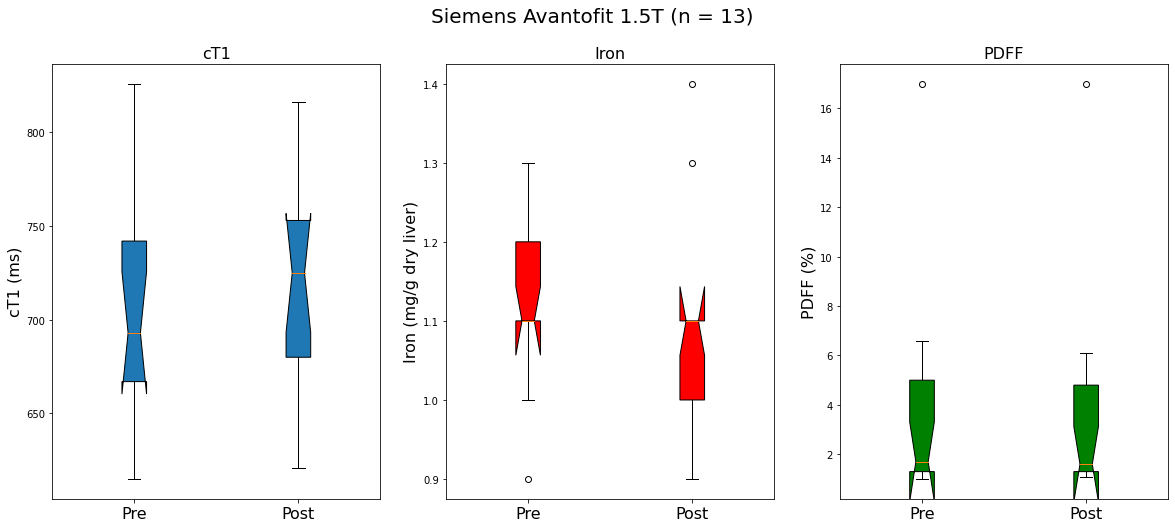

In [125]:
# Plor box plot to see the distributiont of the paried values.
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)

axes[0].boxplot([AV["cT1 median (Pre PJ)"],AV["cT1 median (Post PJ)"]], patch_artist = True, notch = True)
axes[0].set_title("cT1", fontsize = 16)
axes[0].set_ylabel("cT1 (ms)", fontsize = 16)
axes[0].set_xticklabels(['Pre', 'Post'], fontsize = 16)

axes[1].boxplot([AV["Iron median (Pre PJ)"],AV["Iron median (Post PJ)"]], patch_artist = True, notch = True, boxprops = dict(facecolor = 'red'))
axes[1].set_title("Iron", fontsize = 16)
axes[1].set_ylabel("Iron (mg/g dry liver)", fontsize = 16)
axes[1].set_xticklabels(['Pre', 'Post'], fontsize = 16)

axes[2].boxplot([AV["PDFF median (Pre PJ)"],AV["PDFF median (Post PJ)"]], patch_artist = True, notch = True, boxprops = dict(facecolor = 'green'))
axes[2].set_title("PDFF", fontsize = 16)
axes[2].set_ylabel("PDFF (%)", fontsize = 16)
axes[2].set_xticklabels(['Pre', 'Post'], fontsize = 16)
plt.savefig("AV Box.png")

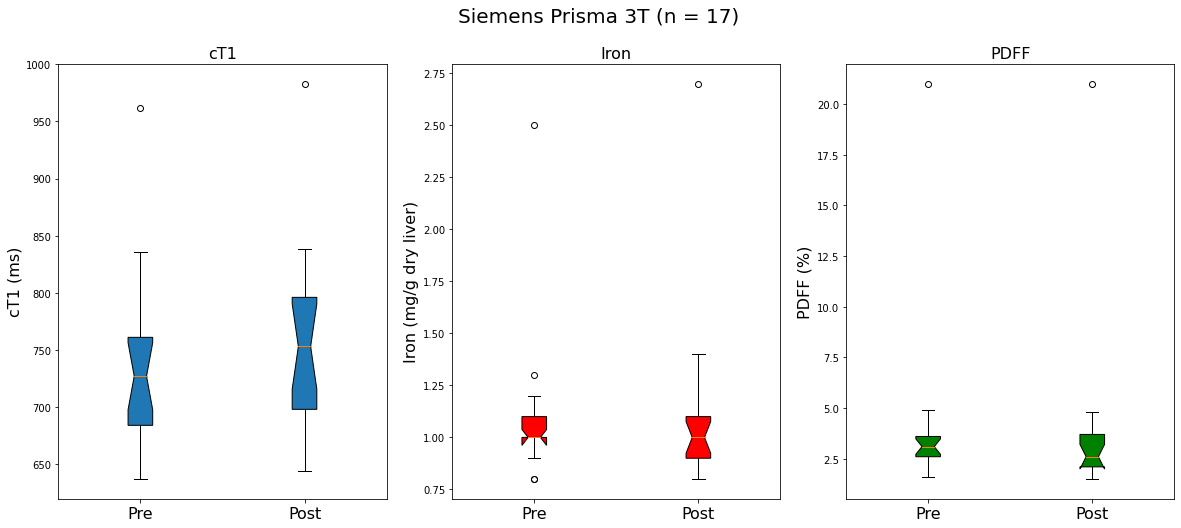

In [126]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

axes[0].boxplot([PA["cT1 median (Pre PJ)"],PA["cT1 median (Post PJ)"]], patch_artist = True, notch = True)
axes[0].set_title("cT1", fontsize = 16)
axes[0].set_ylabel("cT1 (ms)", fontsize = 16)
axes[0].set_xticklabels(['Pre', 'Post'], fontsize = 16)

axes[1].boxplot([PA["Iron median (Pre PJ)"],PA["Iron median (Post PJ)"]], patch_artist = True, notch = True, boxprops = dict(facecolor = 'red'))
axes[1].set_title("Iron", fontsize = 16)
axes[1].set_ylabel("Iron (mg/g dry liver)", fontsize = 16)
axes[1].set_xticklabels(['Pre', 'Post'], fontsize = 16)

axes[2].boxplot([PA["PDFF median (Pre PJ)"],PA["PDFF median (Post PJ)"]], patch_artist = True, notch = True, boxprops = dict(facecolor = 'green'))
axes[2].set_title("PDFF", fontsize = 16)
axes[2].set_ylabel("PDFF (%)", fontsize = 16)
axes[2].set_xticklabels(['Pre', 'Post'], fontsize = 16)
plt.savefig("PA Box.png")

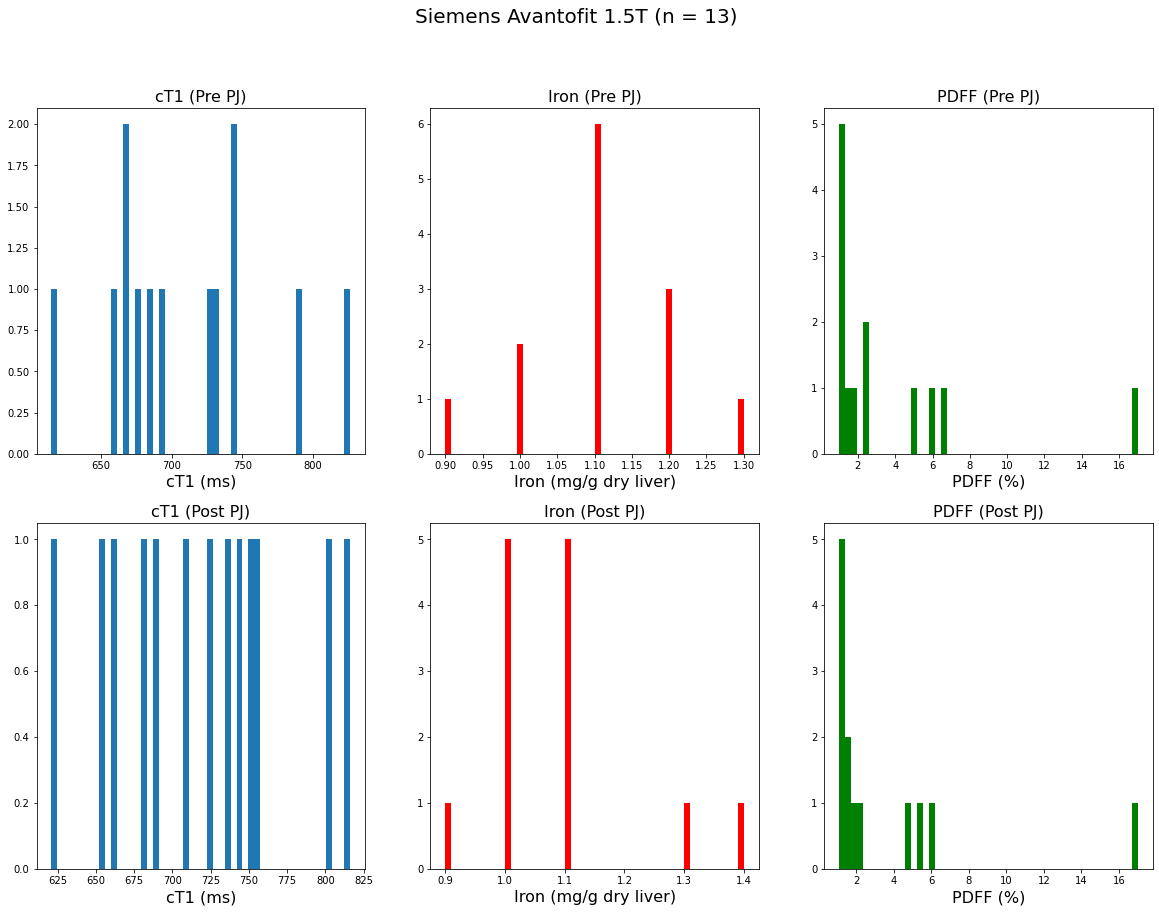

In [127]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,14))
fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)

axes[0, 0].hist(AV["cT1 median (Pre PJ)"], bins = 50)
axes[0, 0].set_title("cT1 (Pre PJ)", fontsize = 16)
axes[0, 0].set_xlabel("cT1 (ms)", fontsize = 16)

axes[0, 1].hist(AV["Iron median (Pre PJ)"], bins = 50, color = 'red')
axes[0, 1].set_title("Iron (Pre PJ)", fontsize = 16)
axes[0, 1].set_xlabel("Iron (mg/g dry liver)", fontsize = 16)


axes[0, 2].hist(AV["PDFF median (Pre PJ)"], bins = 50, color = 'green')
axes[0, 2].set_title("PDFF (Pre PJ)", fontsize = 16)
axes[0, 2].set_xlabel("PDFF (%)", fontsize = 16)

axes[1, 0].hist(AV["cT1 median (Post PJ)"], bins = 50)
axes[1, 0].set_title("cT1 (Post PJ)", fontsize = 16)
axes[1, 0].set_xlabel("cT1 (ms)", fontsize = 16)

axes[1, 1].hist(AV["Iron median (Post PJ)"], bins = 50, color = 'red')
axes[1, 1].set_title("Iron (Post PJ)", fontsize = 16)
axes[1, 1].set_xlabel("Iron (mg/g dry liver)", fontsize = 16)


axes[1, 2].hist(AV["PDFF median (Post PJ)"], bins = 50, color = 'green')
axes[1, 2].set_title("PDFF (Post PJ)", fontsize = 16)
axes[1, 2].set_xlabel("PDFF (%)", fontsize = 16)
plt.savefig("AV Hist.png")

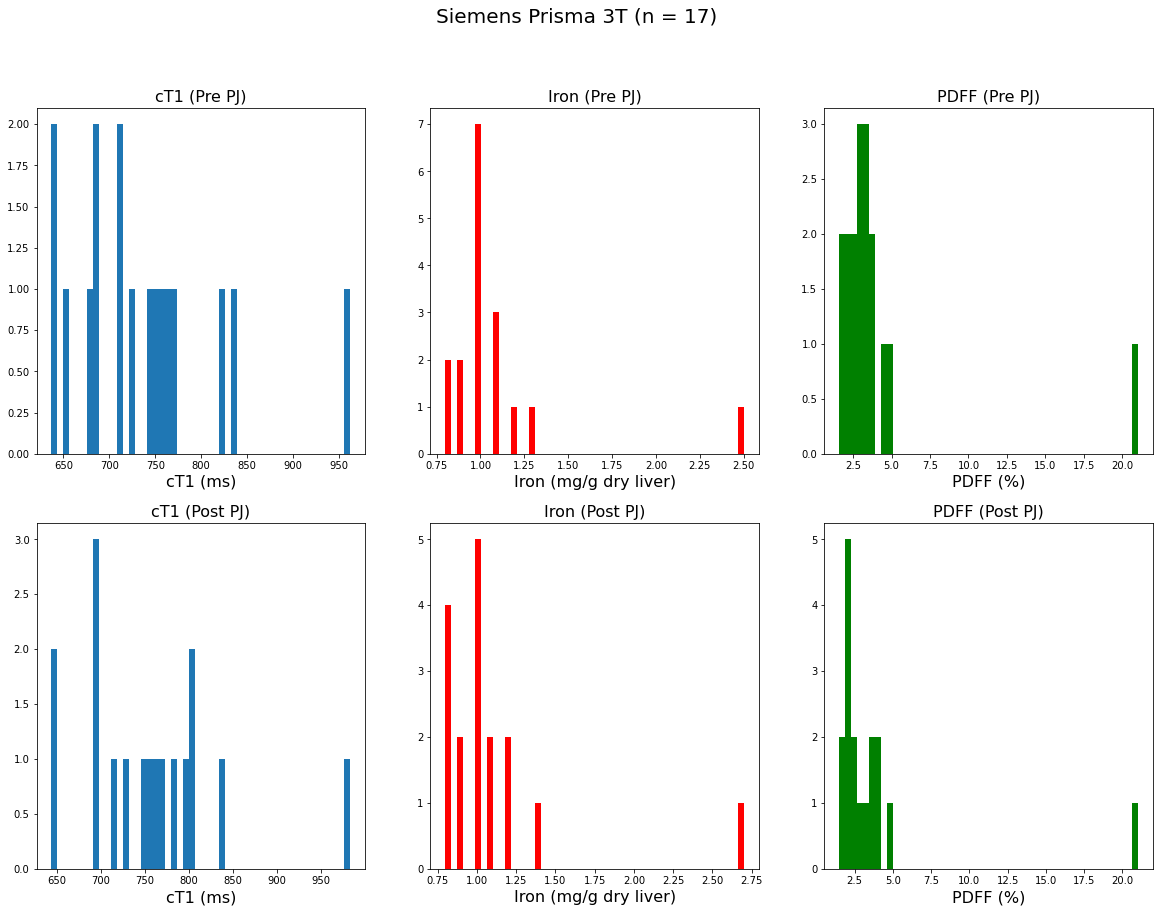

In [128]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,14))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

axes[0, 0].hist(PA["cT1 median (Pre PJ)"], bins = 50)
axes[0, 0].set_title("cT1 (Pre PJ)", fontsize = 16)
axes[0, 0].set_xlabel("cT1 (ms)", fontsize = 16)

axes[0, 1].hist(PA["Iron median (Pre PJ)"], bins = 50, color = 'red')
axes[0, 1].set_title("Iron (Pre PJ)", fontsize = 16)
axes[0, 1].set_xlabel("Iron (mg/g dry liver)", fontsize = 16)


axes[0, 2].hist(PA["PDFF median (Pre PJ)"], bins = 50, color = 'green')
axes[0, 2].set_title("PDFF (Pre PJ)", fontsize = 16)
axes[0, 2].set_xlabel("PDFF (%)", fontsize = 16)

axes[1, 0].hist(PA["cT1 median (Post PJ)"], bins = 50)
axes[1, 0].set_title("cT1 (Post PJ)", fontsize = 16)
axes[1, 0].set_xlabel("cT1 (ms)", fontsize = 16)

axes[1, 1].hist(PA["Iron median (Post PJ)"], bins = 50, color = 'red')
axes[1, 1].set_title("Iron (Post PJ)", fontsize = 16)
axes[1, 1].set_xlabel("Iron (mg/g dry liver)", fontsize = 16)


axes[1, 2].hist(PA["PDFF median (Post PJ)"], bins = 50, color = 'green')
axes[1, 2].set_title("PDFF (Post PJ)", fontsize = 16)
axes[1, 2].set_xlabel("PDFF (%)", fontsize = 16)
plt.savefig("PA Hist.png")

In [84]:
AV_cT1_dif  = AV["cT1 median (Post PJ)"] -  AV["cT1 median (Pre PJ)"]
AV_Iron_dif = AV["Iron median (Post PJ)"] - AV["Iron median (Pre PJ)"]
AV_PDFF_dif = AV["PDFF median (Post PJ)"] - AV["PDFF median (Pre PJ)"]

AV["cT1 Dif"] = cT1_dif
AV["Iron Dif"] = Iron_dif
AV["PDFF Dif"] = PDFF_dif

AV['median_cT1Diff']  = AV_cT1_dif.median()
AV['median_IronDiff'] = AV_Iron_dif.median()
AV['median_PDFFDiff'] = AV_PDFF_dif.median()
print(AV_cT1_dif.median(), AV_Iron_dif.median(), AV_PDFF_dif.median())

12.0 0.0 -0.10000000000000009


<ipython-input-129-95d9e08238ac>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(AV["Record Id"], rotation = 50, ha = 'right')
<ipython-input-129-95d9e08238ac>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(AV["Record Id"], rotation = 50, ha = 'right')
<ipython-input-129-95d9e08238ac>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(AV["Record Id"], rotation = 50, ha = 'right')


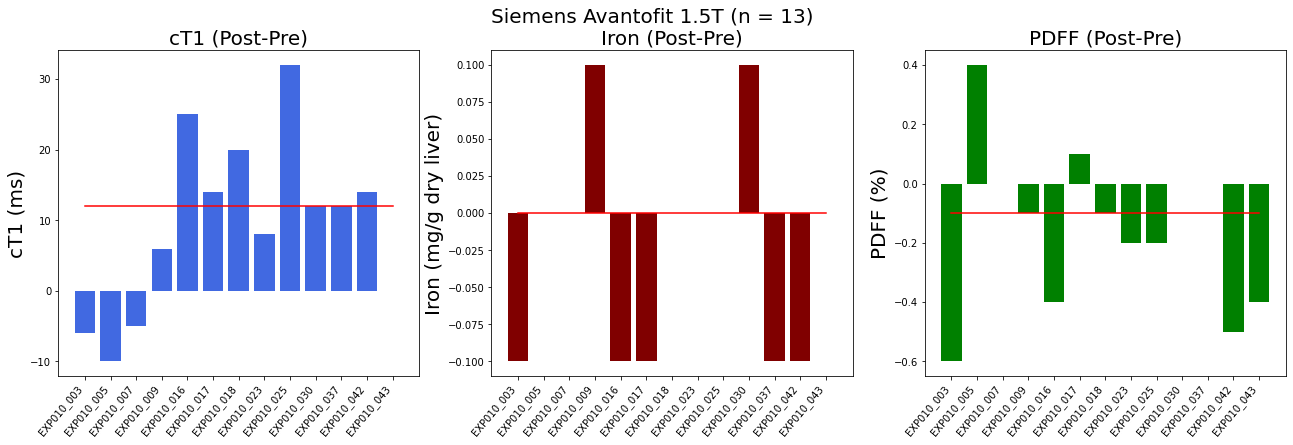

In [129]:
fig = plt.figure(figsize = (22,6))
fig.suptitle('Siemens Avantofit 1.5T (n = 13)', fontsize = 20)

ax1 = fig.add_subplot(131)
plt.bar(AV["Record Id"], AV["cT1 Dif"], color = "royalblue")
plt.plot(AV["Record Id"], AV["median_cT1Diff"], color = 'red')
ax1.set_title('cT1 (Post-Pre)', fontsize = 20)
ax1.set_ylabel("cT1 (ms)", fontsize = 20)
ax1.set_xticklabels(AV["Record Id"], rotation = 50, ha = 'right')

ax2 = fig.add_subplot(132)
plt.bar(AV["Record Id"], AV["Iron Dif"], color = "maroon")
plt.plot(AV["Record Id"], AV["median_IronDiff"], color = 'red')
ax2.set_title('Iron (Post-Pre)', fontsize = 20)
ax2.set_ylabel("Iron (mg/g dry liver)", fontsize = 20)
ax2.set_xticklabels(AV["Record Id"], rotation = 50, ha = 'right')

ax3 = fig.add_subplot(133)
plt.bar(AV["Record Id"], AV["PDFF Dif"], color = "green")
plt.plot(AV["Record Id"], AV["median_PDFFDiff"], color = 'red')
ax3.set_title('PDFF (Post-Pre)', fontsize = 20)
ax3.set_ylabel("PDFF (%)", fontsize = 20)
ax3.set_xticklabels(AV["Record Id"], rotation = 50, ha = 'right')
plt.savefig("AV Bar Delta.png")

In [130]:
PA_cT1_dif  = PA["cT1 median (Post PJ)"] -  PA["cT1 median (Pre PJ)"]
PA_Iron_dif = PA["Iron median (Post PJ)"] - PA["Iron median (Pre PJ)"]
PA_PDFF_dif = PA["PDFF median (Post PJ)"] - PA["PDFF median (Pre PJ)"]

PA["cT1 Dif"] = cT1_dif
PA["Iron Dif"] = Iron_dif
PA["PDFF Dif"] = PDFF_dif

PA['median_cT1Diff']  = PA_cT1_dif.median()
PA['median_IronDiff'] = PA_Iron_dif.median()
PA['median_PDFFDiff'] = PA_PDFF_dif.median()
print(PA_cT1_dif.median(), PA_Iron_dif.median(), PA_PDFF_dif.median())

21.0 0.0 -0.20000000000000018


<ipython-input-131-29c623b54496>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')
<ipython-input-131-29c623b54496>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')
<ipython-input-131-29c623b54496>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')


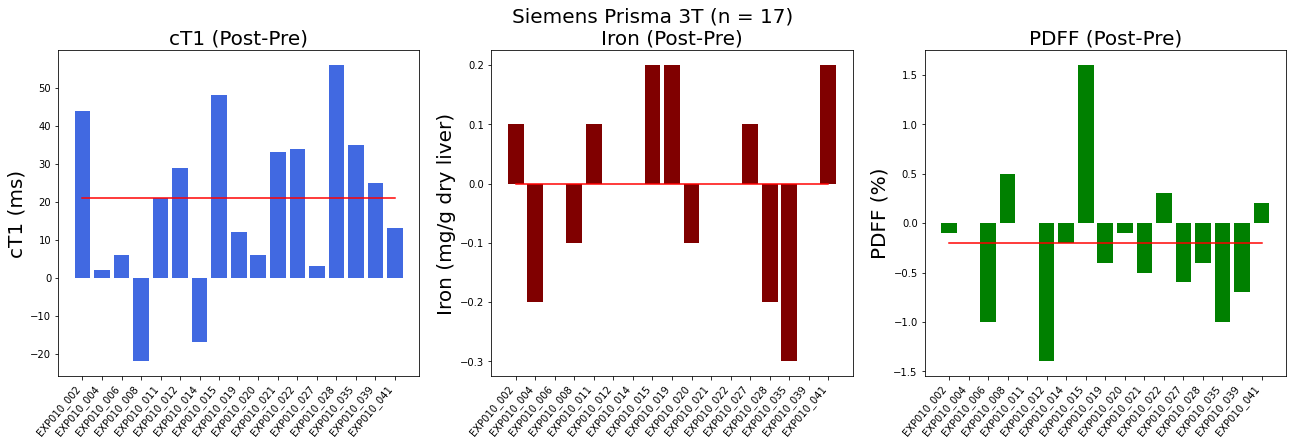

In [131]:
fig = plt.figure(figsize = (22,6))
fig.suptitle('Siemens Prisma 3T (n = 17)', fontsize = 20)

ax1 = fig.add_subplot(131)
plt.bar(PA["Record Id"], PA["cT1 Dif"], color = "royalblue")
plt.plot(PA["Record Id"], PA["median_cT1Diff"], color = 'red')
ax1.set_title('cT1 (Post-Pre)', fontsize = 20)
ax1.set_ylabel("cT1 (ms)", fontsize = 20)
ax1.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')

ax2 = fig.add_subplot(132)
plt.bar(PA["Record Id"], PA["Iron Dif"], color = "maroon")
plt.plot(PA["Record Id"], PA["median_IronDiff"], color = 'red')
ax2.set_title('Iron (Post-Pre)', fontsize = 20)
ax2.set_ylabel("Iron (mg/g dry liver)", fontsize = 20)
ax2.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')

ax3 = fig.add_subplot(133)
plt.bar(PA["Record Id"], PA["PDFF Dif"], color = "green")
plt.plot(PA["Record Id"], PA["median_PDFFDiff"], color = 'red')
ax3.set_title('PDFF (Post-Pre)', fontsize = 20)
ax3.set_ylabel("PDFF (%)", fontsize = 20)
ax3.set_xticklabels(PA["Record Id"], rotation = 50, ha = 'right')
plt.savefig("PA Bar Delta.png")

In [95]:
#define the plotting function
def PrePost(a, b):
    plt.scatter(np.zeros(data_length), a, color = "blue")
    plt.scatter(np.ones(data_length), b, color = "orange")

    for i in range(data_length):
        plt.plot( [0,1], [a.iloc[i], b.iloc[i]], color = "k")
    
    plt.plot([0,1], [np.median(a), np.median(a)], color = "red", linewidth = 3.0)

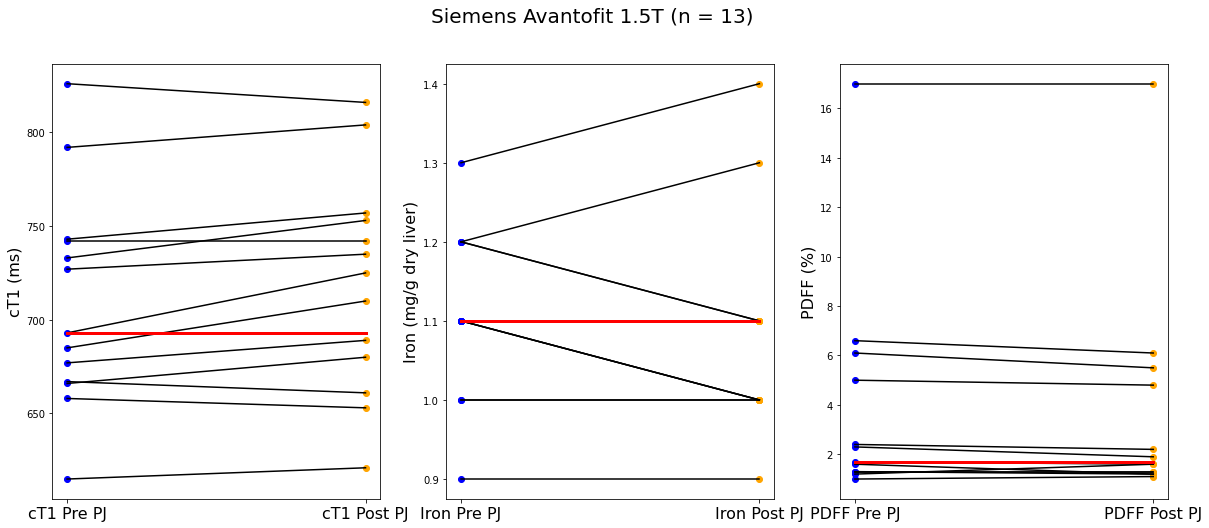

In [132]:
fig = plt.figure(figsize = (20,8))
fig.suptitle("Siemens Avantofit 1.5T (n = 13)", fontsize = 20)

data_length = len(AV["cT1 median (Pre PJ)"])

fig.add_subplot(131)
PrePost(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"])
plt.xticks([0,1], ["cT1 Pre PJ", "cT1 Post PJ"], fontsize = 16) 
plt.ylabel("cT1 (ms)", fontsize = 16)

fig.add_subplot(132)
PrePost(AV["Iron median (Pre PJ)"], AV["Iron median (Post PJ)"])
plt.xticks([0,1], ["Iron Pre PJ", "Iron Post PJ"], fontsize = 16)
plt.ylabel("Iron (mg/g dry liver)", fontsize = 16)

fig.add_subplot(133)
PrePost(AV["PDFF median (Pre PJ)"], AV["PDFF median (Post PJ)"])
plt.xticks([0,1], ["PDFF Pre PJ", "PDFF Post PJ"], fontsize = 16)
plt.ylabel("PDFF (%)", fontsize = 16)
plt.savefig("AV Trend.png")

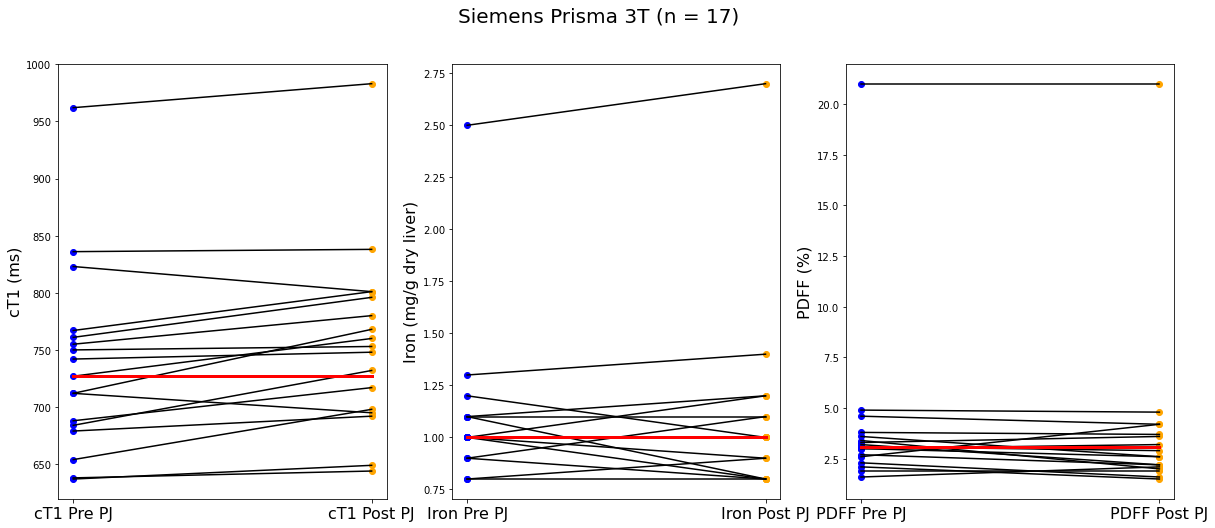

In [133]:
fig = plt.figure(figsize = (20,8))
fig.suptitle("Siemens Prisma 3T (n = 17)", fontsize = 20)

data_length = len(PA["cT1 median (Pre PJ)"])

fig.add_subplot(131)
PrePost(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"])
plt.xticks([0,1], ["cT1 Pre PJ", "cT1 Post PJ"], fontsize = 16) 
plt.ylabel("cT1 (ms)", fontsize = 16)

fig.add_subplot(132)
PrePost(PA["Iron median (Pre PJ)"], PA["Iron median (Post PJ)"])
plt.xticks([0,1], ["Iron Pre PJ", "Iron Post PJ"], fontsize = 16)
plt.ylabel("Iron (mg/g dry liver)", fontsize = 16)

fig.add_subplot(133)
PrePost(PA["PDFF median (Pre PJ)"], PA["PDFF median (Post PJ)"])
plt.xticks([0,1], ["PDFF Pre PJ", "PDFF Post PJ"], fontsize = 16)
plt.ylabel("PDFF (%)", fontsize = 16)
plt.savefig("PA Trend.png")

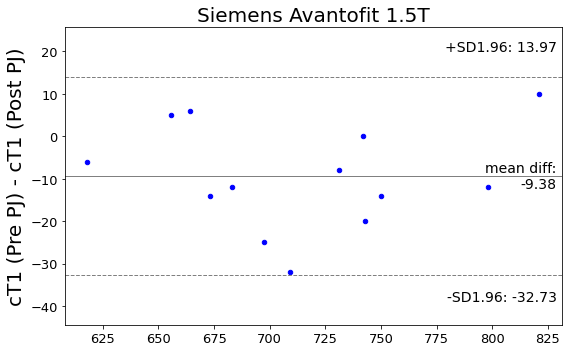

In [160]:
# Plot Bland Altman plots 
# https://stackoverflow.com/questions/16399279/bland-altman-plot-in-python

f, ax = plt.subplots(figsize = (8, 5))
sm.graphics.mean_diff_plot(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"blue"})
ax.set_ylabel("cT1 (Pre PJ) - cT1 (Post PJ)", fontsize = 20)
ax.set_title("Siemens Avantofit 1.5T", fontsize = 20)
ax.set_xlabel('')
plt.tight_layout()
plt.savefig("AV cT1 Bland Altman.png")

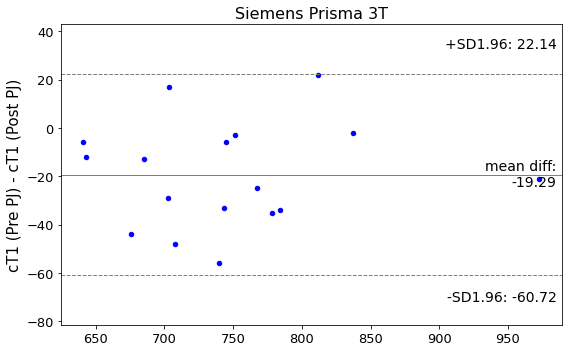

In [161]:
f, ax = plt.subplots(figsize = (8, 5))
sm.graphics.mean_diff_plot(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"blue"})
ax.set_ylabel("cT1 (Pre PJ) - cT1 (Post PJ)")
ax.set_title("Siemens Prisma 3T", fontsize = 16)
ax.set_xlabel('')
plt.tight_layout()
plt.savefig("PA cT1 Bland Altman.png")

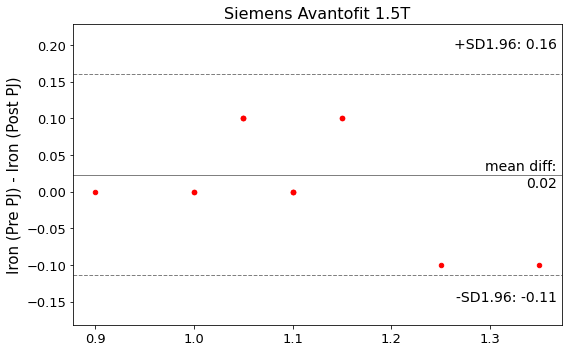

In [162]:
f, ax = plt.subplots(figsize = (8, 5))
sm.graphics.mean_diff_plot(AV["Iron median (Pre PJ)"], AV["Iron median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"red"})
ax.set_ylabel("Iron (Pre PJ) - Iron (Post PJ)")
ax.set_title("Siemens Avantofit 1.5T", fontsize = 16)
ax.set_xlabel('')
plt.tight_layout()
plt.savefig("AV Iron Bland Altman.png")

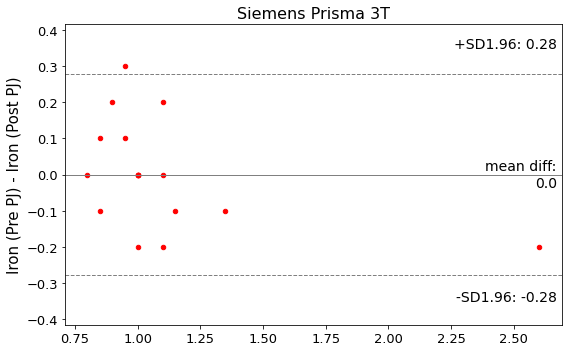

In [163]:
f, ax = plt.subplots(figsize = (8, 5))
sm.graphics.mean_diff_plot(PA["Iron median (Pre PJ)"], PA["Iron median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"red"})
ax.set_ylabel("Iron (Pre PJ) - Iron (Post PJ)")
ax.set_title("Siemens Prisma 3T", fontsize = 16)
ax.set_xlabel('')
plt.tight_layout()
plt.savefig("PA Iron Bland Altman.png")

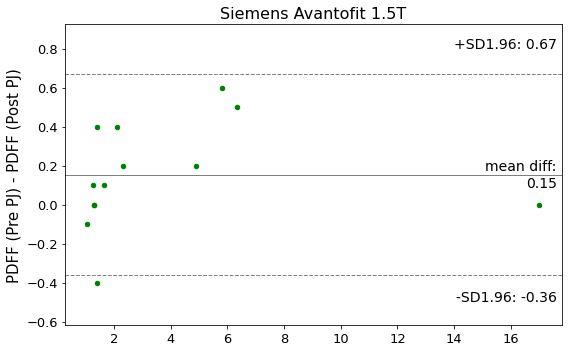

In [164]:
f, ax = plt.subplots(figsize = (8, 5))
sm.graphics.mean_diff_plot(AV["PDFF median (Pre PJ)"], AV["PDFF median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"green"})
ax.set_ylabel("PDFF (Pre PJ) - PDFF (Post PJ)")
ax.set_title("Siemens Avantofit 1.5T", fontsize = 16)
ax.set_xlabel('')
plt.tight_layout()
plt.savefig("AV PDFF Bland Altman.png")

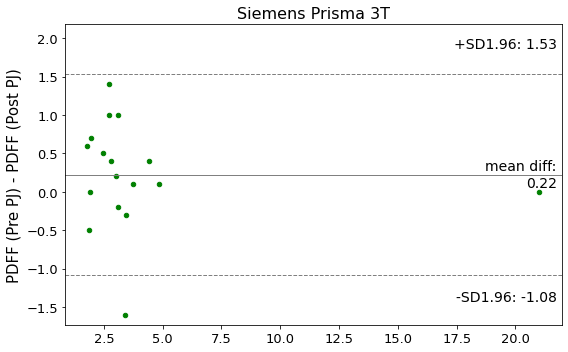

In [165]:
f, ax = plt.subplots(figsize = (8, 5))
sm.graphics.mean_diff_plot(PA["PDFF median (Pre PJ)"], PA["PDFF median (Post PJ)"],  ax = ax, scatter_kwds = {"color":"green"})
ax.set_ylabel("PDFF (Pre PJ) - PDFF (Post PJ)")
ax.set_title("Siemens Prisma 3T", fontsize = 16)
ax.set_xlabel('')
plt.tight_layout()
plt.savefig("PA PDFF Bland Altman.png")

In [168]:
# Use Shapio- Wilk test to test Normality
# If W is less than one, the dataset is away from being drawn from normal distribution.
# The p value of Shapiro Wilk Test is to test the hyposthesis of the Shapio-Wilk test to reject the null Ho
# Shapiro Wilk test is quite sensitive, sometimes if the data from histigram seems normallt distributed, it can still be test with parametric t test.
# https://www.youtube.com/watch?v=dRAqSsgkCUc&ab_channel=MatthewE.Clapham



a = stats.shapiro(AV["cT1 median (Pre PJ)"])
b = stats.shapiro(AV["Iron median (Pre PJ)"])
c = stats.shapiro(AV["PDFF median (Pre PJ)"])
d = stats.shapiro(AV["cT1 median (Post PJ)"])
e = stats.shapiro(AV["Iron median (Post PJ)"])
f = stats.shapiro(AV["PDFF median (Post PJ)"])

data = {"Biomarkers" : ["cT1 Pre PJ", "Iron (Pre PJ)", "PDFF (Pe PJ)", "cT1 (Post PJ)", "Iron (Post PF)", "PDFF (Post PJ)"], "Shapiro Wilk Test Result (W, p value)": [a, b, c, d, e, f], "Normal Distribution?": ["No", "No", "No", "No", "No", "No"]}
SP = pd.DataFrame(data = data)
SP.style.set_caption("Siemens Avantofit 1.5T")
dfi.export(SP, "AV Shapiro Wilk Test for Normality.png")

In [171]:

a = stats.shapiro(PA["cT1 median (Pre PJ)"])
b = stats.shapiro(PA["Iron median (Pre PJ)"])
c = stats.shapiro(PA["PDFF median (Pre PJ)"])
d = stats.shapiro(PA["cT1 median (Post PJ)"])
e = stats.shapiro(PA["Iron median (Post PJ)"])
f = stats.shapiro(PA["PDFF median (Post PJ)"])

data = {"Biomarkers" : ["cT1 Pre PJ", "Iron (Pre PJ)", "PDFF (Pe PJ)", "cT1 (Post PJ)", "Iron (Post PF)", "PDFF (Post PJ)"], "Shapiro Wilk Test Result (W, p value)": [a, b, c, d, e, f], "Normal Distribution?": ["No", "No", "No", "No", "No", "No"]}
SP = pd.DataFrame(data = data)
SP.style.set_caption("Siemens Prisma 3T")
dfi.export(SP, "PA Shapiro Wilk Test for Normality.png")

In [13]:
# Strictly speaking because the cT1 datasets failed Shapiro Wilk test, it is not normallyu distributed however, given the fact that the histogram shows a distributioin similar to normal distribution, we use paired student t test to see if cT1 Pre and Post difference is significant
# Regarding whether or not using one tailed or 2-tailed, this has to be driven by expectation.  Not by looking at the data!
# https://www.youtube.com/watch?v=AZHh5iGdJUw&list=PLfhL43gLKJ5lBXJw5THlC2V0BZ1FuItuv&index=5&ab_channel=MatthewE.Clapham

cT1TT = stats.ttest_rel(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"])
IronTT = stats.ttest_rel(AV["Iron median (Pre PJ)"], AV["Iron median (Post PJ)"])
PDFFTT = stats.ttest_rel(AV["PDFF median (Pre PJ)"], AV["PDFF median (Post PJ)"])
Tcritical = '±2.001717'
data2 = {"Biomarkers":["cT1", "Iron", "PDFF"], "Paired T Test (T, p value) Avantofit 1.5T":[cT1TT, IronTT, PDFFTT], "T critical": [Tcritical, Tcritical, Tcritical], "Difference is significant?": ['Yes', 'No', 'No']}
TT = pd.DataFrame(data = data2)
TT


,Biomarkers,"Paired T Test (T, p value) Avantofit 1.5T",T critical,Difference is significant?
0,cT1,"(-2.7287989483455823, 0.01830715858404923)",±2.001717,Yes
1,Iron,"(1.1476380835140092, 0.27348356292027853)",±2.001717,No
2,PDFF,"(2.0341905108624307, 0.06464944623809715)",±2.001717,No


In [14]:
cT1TT = stats.ttest_rel(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"])
IronTT = stats.ttest_rel(PA["Iron median (Pre PJ)"], PA["Iron median (Post PJ)"])
PDFFTT = stats.ttest_rel(PA["PDFF median (Pre PJ)"], PA["PDFF median (Post PJ)"])
Tcritical = '±2.001717'
data2 = {"Biomarkers":["cT1", "Iron", "PDFF"], "Paired T Test (T, p value) Prisma 3T":[cT1TT, IronTT, PDFFTT], "T critical": [Tcritical, Tcritical, Tcritical], "Difference is significant?": ['Yes', 'No', 'No']}
TT2 = pd.DataFrame(data = data2)
TT2

,Biomarkers,"Paired T Test (T, p value) Prisma 3T",T critical,Difference is significant?
0,cT1,"(-3.6511556668119423, 0.002153453566093387)",±2.001717,Yes
1,Iron,"(0.0, 1.0)",±2.001717,No
2,PDFF,"(1.3433979353901426, 0.19788798520285225)",±2.001717,No


In [ ]:
cT1TT = stats.wilcoxon(AV["cT1 median (Pre PJ)"], AV["cT1 median (Post PJ)"])
IronTT = stats.wilcoxon(AV["Iron median (Pre PJ)"], AV["Iron median (Post PJ)"])
PDFFTT = stats.wilcoxon(AV["PDFF median (Pre PJ)"], AV["PDFF median (Post PJ)"])
data2 = {"Biomarkers":["cT1", "Iron", "PDFF"], "Wilcoxon signed-rank Test (W, p) Avantofit 1.5T":[cT1TT, IronTT, PDFFTT], "Difference is significant?": ['Yes', 'No', 'No']}
W = pd.DataFrame(data = data2)
W


In [ ]:
cT1TT = stats.wilcoxon(PA["cT1 median (Pre PJ)"], PA["cT1 median (Post PJ)"])
IronTT = stats.wilcoxon(PA["Iron median (Pre PJ)"], PA["Iron median (Post PJ)"])
PDFFTT = stats.wilcoxon(PA["PDFF median (Pre PJ)"], PA["PDFF median (Post PJ)"])
Tcritical = '±2.001717'
data2 = {"Biomarkers":["cT1", "Iron", "PDFF"], "Wilcoxon signed-rank Test (W, p) Prisma 3T":[cT1TT, IronTT, PDFFTT], "Difference is significant?": ['Yes', 'No', 'No']}
W2 = pd.DataFrame(data = data2)
W2